In [379]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import CMR_IA as cmr
import scipy as sp
from matplotlib.lines import Line2D
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

In [380]:
with open("simu3_data/simu3_design.pkl", 'rb') as inp:
    df = pickle.load(inp)
df = df.loc[df.session < 300]
df

,position,session,testidx,lag,type,study_itemno1,study_itemno2,test_itemno1,test_itemno2
0,0,0,147,0,no_fit,708,1244,664,972
1,1,0,151,0,no_fit,751,680,339,1537
2,2,0,156,0,no_fit,823,1591,1298,1393
3,3,0,17,0,no_fit,880,1325,226,1545
4,4,0,90,0,no_fit,51,1505,603,433
...,...,...,...,...,...,...,...,...,...
47995,155,299,147,8,single_old,1357,1635,1151,-1
47996,156,299,150,6,pair_new,1195,508,597,175
47997,157,299,153,4,pair_new,919,446,1406,613
47998,158,299,152,6,pair_old,330,1308,1406,1327


### Run CMR-IA

In [381]:
s_mat = np.load('../../Data/wordpools/ltp_FR_similarity_matrix.npy')

In [382]:
# 0.59377257 0.34222661 0.51957597 0.16834709 0.39072077 0.33087008 0.48325221 (0.01604742573911253)
# 0.58517426 0.34567003 0.52955072 0.16875059 0.38979058 0.33175906 0.48346729 (0.01524651759221708)
# 0.29588302 0.21210603 0.08986829 0.62154884 0.4486458  0.77061723 0.81173868 (0.129) item perfect, assoc bad learning
params = cmr.make_default_params()
params.update(
    beta_enc = 0.45,  # 0.1  /0.4
    beta_cue = 0.45,  # 0.4  /0.7
    beta_rec_post = 0.01,  # 0.1
    s_fc = 0.4,  # 0.1
    gamma_fc = 0.5,  # 0.1
    c_thresh_itm = 0.59,  # 0.22
    c_thresh_ass = 0.7,  # 0.285
    d_ass = 0,
    use_new_context = True,
)
params

{'beta_enc': 0.45,
 'beta_rec': 0.5,
 'beta_cue': 0.45,
 'beta_rec_post': 0.01,
 'beta_distract': None,
 'phi_s': 2,
 'phi_d': 0.5,
 's_cf': 0,
 's_fc': 0.4,
 'kappa': 0.5,
 'eta': 0.5,
 'omega': 5,
 'alpha': 1,
 'c_thresh': 0.5,
 'c_thresh_itm': 0.59,
 'c_thresh_ass': 0.7,
 'd_ass': 0,
 'lamb': 0.5,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 50,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 20,
 'm': 0,
 'n': 1,
 'c1': 0,
 'thresh_sigma': 0,
 'No_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'gamma_fc': 0.5,
 'gamma_cf': 0.5,
 'use_new_context': True}

In [383]:
# pos_b = np.arange(0,1,0.05)
# csim_old = []
# csim_new = []
# for b in pos_b:
#     # print(b)
#     params.update(beta_enc = b)
#     df_simu = cmr.run_hockley_recog_multi_sess(params,df,s_mat)
#     df_simu = df_simu.merge(df,on=['session','position','study_itemno1','study_itemno2','test_itemno1','test_itemno2'])
#     old = df_simu.loc[df_simu.type == 1].csim.mean()
#     new = df_simu.loc[df_simu.type == 0].csim.mean()
#     csim_old.append(old)
#     csim_new.append(new)
# df_tmp = pd.DataFrame(data = {'b':pos_b, 'old':csim_old, 'new':csim_new})
# sns.lineplot(data=df_tmp, x='b', y='old', linewidth=2)
# sns.lineplot(data=df_tmp, x='b', y='new', linewidth=2)

In [384]:
df_simu = cmr.run_conti_recog_multi_sess(params, df, s_mat, mode="Hockley")
df_simu

100%|██████████| 300/300 [00:44<00:00,  6.78it/s]

CMR Time: 44.2449791431427


,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim
0,0,0,708,1244,664,972,0.0,3.200118,0.251291
1,0,1,751,680,339,1537,0.0,2092.134766,0.604572
2,0,2,823,1591,1298,1393,0.0,1374.685303,0.554430
3,0,3,880,1325,226,1545,0.0,2396.109131,0.582211
4,0,4,51,1505,603,433,0.0,1854.500610,0.569400
...,...,...,...,...,...,...,...,...,...
47995,299,155,1357,1635,1151,-1,1.0,47.927868,0.793384
47996,299,156,1195,508,597,175,1.0,62.322433,0.780253
47997,299,157,919,446,1406,613,0.0,621.130981,0.665292
47998,299,158,330,1308,1406,1327,1.0,32.839783,0.812287


In [385]:
df_simu = df_simu.merge(df,on=['session','position','study_itemno1','study_itemno2','test_itemno1','test_itemno2'])
df_simu

,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim,testidx,lag,type
0,0,0,708,1244,664,972,0.0,3.200118,0.251291,147,0,no_fit
1,0,1,751,680,339,1537,0.0,2092.134766,0.604572,151,0,no_fit
2,0,2,823,1591,1298,1393,0.0,1374.685303,0.554430,156,0,no_fit
3,0,3,880,1325,226,1545,0.0,2396.109131,0.582211,17,0,no_fit
4,0,4,51,1505,603,433,0.0,1854.500610,0.569400,90,0,no_fit
...,...,...,...,...,...,...,...,...,...,...,...,...
47995,299,155,1357,1635,1151,-1,1.0,47.927868,0.793384,147,8,single_old
47996,299,156,1195,508,597,175,1.0,62.322433,0.780253,150,6,pair_new
47997,299,157,919,446,1406,613,0.0,621.130981,0.665292,153,4,pair_new
47998,299,158,330,1308,1406,1327,1.0,32.839783,0.812287,152,6,pair_old


In [386]:
df_simu.groupby(['type','lag']).csim.mean()

type        lag
no_fit      0      0.553142
pair_new    2      0.746636
            4      0.743094
            6      0.743543
            8      0.741903
            16     0.739777
pair_old    2      0.791252
            4      0.785725
            6      0.785887
            8      0.784609
            16     0.784001
single_new  2      0.541247
            4      0.540076
            6      0.540588
            8      0.541618
            16     0.535624
single_old  2      0.738088
            4      0.723330
            6      0.720544
            8      0.722356
            16     0.717794
Name: csim, dtype: float64

### PLOT

In [387]:
df_laggp = df_simu.groupby(['type','lag']).s_resp.mean().to_frame(name='yes_rate').reset_index()
df_laggp['no_rate'] = 1 - df_laggp['yes_rate'] 
df_laggp

,type,lag,yes_rate,no_rate
0,no_fit,0,0.178891,0.821109
1,pair_new,2,0.824585,0.175415
2,pair_new,4,0.802198,0.197802
3,pair_new,6,0.807001,0.192999
4,pair_new,8,0.784149,0.215851
5,pair_new,16,0.775190,0.224810
6,pair_old,2,0.968508,0.031492
7,pair_old,4,0.953060,0.046940
8,pair_old,6,0.966071,0.033929
9,pair_old,8,0.955450,0.044550


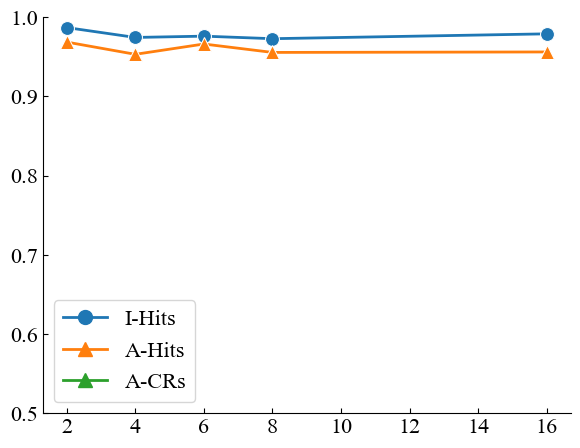

In [388]:
fig, ax = plt.subplots(figsize=(6,4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_laggp.loc[df_laggp.type == 'single_old'], x='lag', y='yes_rate', linewidth=2, marker='o', markersize = 10, label='I-Hits')
sns.lineplot(data=df_laggp.loc[df_laggp.type == 'pair_old'], x='lag', y='yes_rate', linewidth=2, marker='^', markersize = 10, label='A-Hits')
sns.lineplot(data=df_laggp.loc[df_laggp.type == 'pair_new'], x='lag', y='no_rate', linewidth=2, marker='^', markersize = 10, label='A-CRs')
plt.ylim([0.5,1])
plt.xlabel('Test Lag')
plt.ylabel('Proportion Correct')
ax.set(xlabel=None, ylabel=None)
plt.xticks(ticks=np.arange(2,18,2))
# plt.tick_params(labelleft=False)
legend_elements = [Line2D([0], [0], color = sns.color_palette()[0], lw=2, marker='o', markersize = 10, linestyle='-',label = 'I-Hits'),
                   Line2D([0], [0], color = sns.color_palette()[1], lw=2, marker='^', markersize = 10, linestyle='-', label = 'A-Hits'),
                   Line2D([0], [0], color = sns.color_palette()[2], lw=2, marker='^', markersize = 10, linestyle='-', label = 'A-CRs')]
plt.legend(handles = legend_elements)

# plt.savefig('simu3_fig/simu3_hr.pdf')
plt.show()

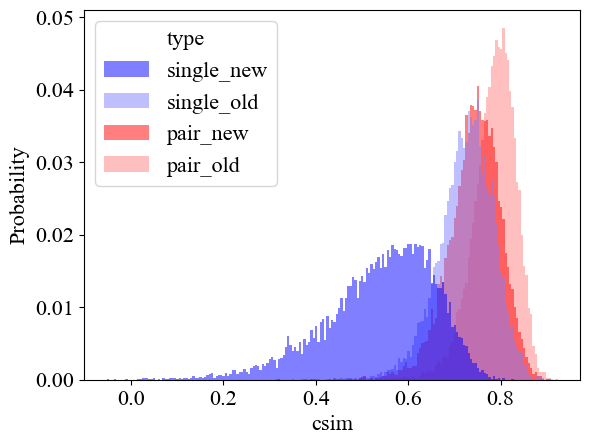

In [389]:
sns.histplot(data=df_simu, x="csim", hue = "type", hue_order = ['single_new', 'single_old', 'pair_new', 'pair_old'], palette = [[0,0,1],[0.5,0.5,1],[1,0,0],[1,0.5,0.5]], stat = "probability", binwidth = 0.005, common_norm=False, edgecolor = None)
# plt.savefig('fig/simu3_csim.pdf')
plt.show()

In [390]:
df_dprime = pd.DataFrame()
df_dprime['lag'] = [2,4,6,8,16]
df_dprime['I_z_hr'] = sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 'single_old', 'yes_rate'].astype(float))
df_dprime['I_z_far'] = sp.stats.norm.ppf(np.mean(df_laggp.loc[df_laggp.type == 'single_new', 'yes_rate'].astype(float)))
df_dprime['I_dprime'] = df_dprime['I_z_hr'] - df_dprime['I_z_far']
df_dprime['A_z_hr'] = sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 'pair_old', 'yes_rate'].astype(float))
df_dprime['A_z_far'] = sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 'pair_new', 'yes_rate'].astype(float))
df_dprime['A_dprime'] = df_dprime['A_z_hr'] - df_dprime['A_z_far']
df_dprime

,lag,I_z_hr,I_z_far,I_dprime,A_z_hr,A_z_far,A_dprime
0,2,2.221520,-0.298464,2.519983,1.859298,0.932981,0.926317
1,4,1.949112,-0.298464,2.247576,1.675279,0.849498,0.825782
2,6,1.977304,-0.298464,2.275768,1.825943,0.866899,0.959044
3,8,1.923363,-0.298464,2.221826,1.700167,0.786283,0.913884
4,16,2.031880,-0.298464,2.330344,1.706516,0.756049,0.950467


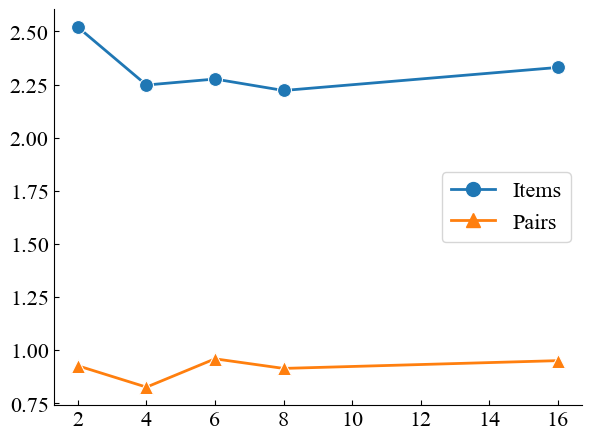

In [391]:
fig, ax = plt.subplots(figsize=(6,4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_dprime, x='lag', y='I_dprime', linewidth=2, marker='o', markersize = 10, label='Items')
sns.lineplot(data=df_dprime, x='lag', y='A_dprime', linewidth=2, marker='^', markersize = 10, label='Pairs')
# plt.ylabel("$d^'$")
# plt.xlabel('Test Lag')
ax.set(xlabel=None, ylabel=None)
# plt.ylim([0.5,4])
plt.xticks(ticks=np.arange(2,18,2))
# plt.tick_params(labelleft=False)
legend_elements = [Line2D([0], [0], color = sns.color_palette()[0], lw=2, marker='o', markersize = 10, linestyle='-',label = 'Items'),
                   Line2D([0], [0], color = sns.color_palette()[1], lw=2, marker='^', markersize = 10, linestyle='-', label = 'Pairs')]
plt.legend(handles = legend_elements)

# plt.savefig('simu3_fig/simu3_dprime.pdf')
plt.show()

In [392]:
# get the vectors
I_hr = df_laggp.loc[df_laggp.type == 'single_old', "yes_rate"].to_numpy()
I_far = np.mean(df_laggp.loc[df_laggp.type == 'single_new', 'yes_rate'].astype(float))
A_hr = df_laggp.loc[df_laggp.type == 'pair_old', "yes_rate"].to_numpy()
A_far = df_laggp.loc[df_laggp.type == 'pair_new', "yes_rate"].to_numpy()
# I_dprime = df_dprime['I_dprime'].to_numpy()
# A_dprime = df_dprime['A_dprime'].to_numpy()

# ground truth
I_hr_gt = np.array([0.865, 0.811, 0.752, 0.746, 0.708])
I_far_gt = 0.15  # 0.12
A_hr_gt = np.array([0.843, 0.787, 0.720, 0.735, 0.646])
A_far_gt = np.array([0.406, 0.371, 0.285, 0.259, 0.202])
# I_dprime_gt = np.array([2.31, 2.05, 1.85, 1.84, 1.68])
# A_dprime_gt = np.array([1.36, 1.29, 1.37, 1.58, 1.39])

# calculate the error
pow_err = np.mean(np.power(I_hr - I_hr_gt, 2)) + np.mean(np.power(A_hr - A_hr_gt, 2)) \
    + np.power(I_far - I_far_gt, 2) * 5 + np.mean(np.power(A_far - A_far_gt, 2))
abs_err = np.mean(np.abs(I_hr - I_hr_gt)) + np.mean(np.abs(A_hr - A_hr_gt)) \
    + np.abs(I_far - I_far_gt) * 5 + np.mean(np.abs(A_far - A_far_gt))
err = pow_err + abs_err / 10
err

0.8185468806069515

In [393]:
I_hr, I_far, A_hr, A_far

(array([0.98684211, 0.97435897, 0.97599638, 0.97278273, 0.97891711]),
 0.38267459073738863,
 array([0.96850753, 0.95306029, 0.96607061, 0.95545024, 0.95604396]),
 array([0.82458502, 0.8021978 , 0.80700138, 0.78414918, 0.77519011]))